# Dados da Fórmula 1 de 1950 à 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Conectando com todos os CSV
dfCircuitos = pd.read_csv("../../data/raw/DataBaseF1/circuits.csv")
dfConstrutoresResultado = pd.read_csv("../../data/raw/DataBaseF1/constructor_results.csv")
dfConstrutoresClassificacao = pd.read_csv("../../data/raw/DataBaseF1/constructor_standings.csv")
dfConstrutores = pd.read_csv("../../data/raw/DataBaseF1/constructors.csv")
dfPilotosClassificacao = pd.read_csv("../../data/raw/DataBaseF1/driver_standings.csv")
dfPilotos = pd.read_csv("../../data/raw/DataBaseF1/drivers.csv")
dfVoltas = pd.read_csv("../../data/raw/DataBaseF1/lap_times.csv")
dfPitStops = pd.read_csv("../../data/raw/DataBaseF1/pit_stops.csv")
dfQualificacao = pd.read_csv("../../data/raw/DataBaseF1/qualifying.csv")
dfCorridas = pd.read_csv("../../data/raw/DataBaseF1/races.csv")
dfResultadosCorrida = pd.read_csv("../../data/raw/DataBaseF1/results.csv")
dfTemporadas = pd.read_csv("../../data/raw/DataBaseF1/seasons.csv")
dfSprints = pd.read_csv("../../data/raw/DataBaseF1/sprint_results.csv")
dfStatus = pd.read_csv("../../data/raw/DataBaseF1/status.csv")

## Pilotos com mais vitórias na Fórmmula 1

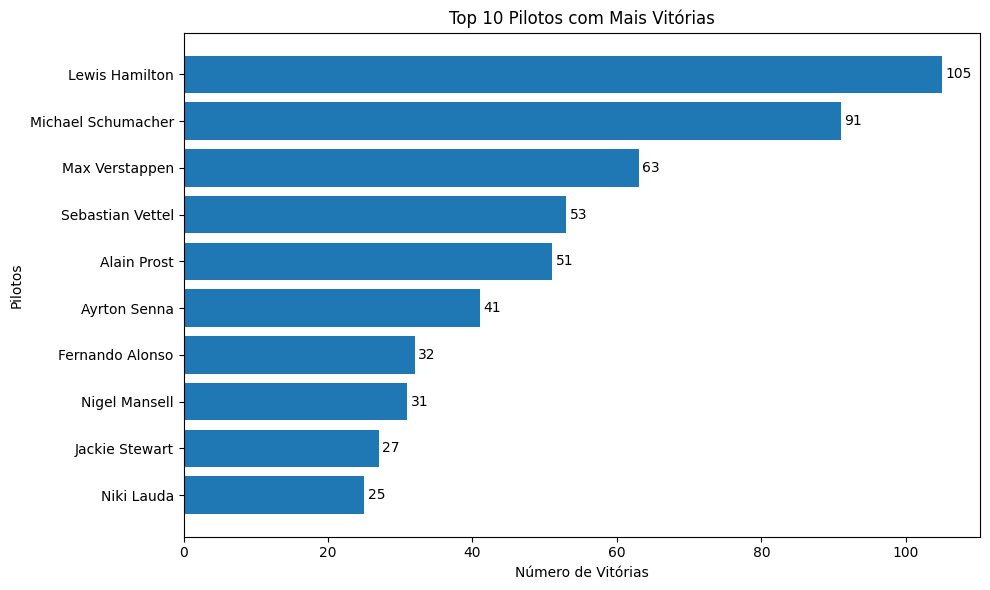

In [3]:
dfVitorias = dfResultadosCorrida[dfResultadosCorrida['positionOrder'] == 1]
dfVitorias = dfVitorias.merge(dfPilotos[['driverId', 'forename', 'surname', 'dob']], on='driverId', how='left')
dfVitorias.rename(columns={'dob': 'Data de Nascimento', 'forename': 'Nome', 'surname': 'Sobrenome'}, inplace=True)
dfVitorias = dfVitorias.groupby(['driverId', 'Nome', 'Sobrenome', 'Data de Nascimento']).size().reset_index(name='Vitórias').sort_values(by='Vitórias', ascending=False)
dfTop10 = dfVitorias.head(10).iloc[::-1]  # inverte p/ maior ficar no topo

# plot - top 10 pilotos com mais vitórias
plt.figure(figsize=(10, 6))
plt.barh(
    dfTop10['Nome'] + ' ' + dfTop10['Sobrenome'],
    dfTop10['Vitórias']
)

# Adiciona os números no final das barras
for i, v in enumerate(dfTop10['Vitórias']):
    plt.text(
        v + 0.5,  # desloca um pouco pra frente da barra
        i,        # posição na vertical
        str(v),   # texto = número de vitórias
        va='center'
    )

plt.title('Top 10 Pilotos com Mais Vitórias')
plt.xlabel('Número de Vitórias')
plt.ylabel('Pilotos')
plt.tight_layout()
plt.show()
